<a href="https://colab.research.google.com/github/FERNANDOBUCHELLY/TAM2025-2/blob/main/Untitled9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Implementa en Python la proyección de un vector 2D sobre otro utilizando la solución analítica y la solución iterativa (descenso de gradiente). Incluye comentarios en el código, describe paso a paso la solución y visualiza los resultados.

## Configuración del problema

### Subtask:
Definir los dos vectores en 2D sobre los que se realizará la proyección.


**Reasoning**:
The first step is to import the necessary library and define the two vectors as NumPy arrays.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los dos vectores 2D
vector_a = np.array([4, 5])
vector_b = np.array([8, 2])

print("Vector a:", vector_a)
print("Vector b:", vector_b)

Vector a: [4 5]
Vector b: [8 2]


In [2]:
# Solución Analítica
# Calcular el producto punto de los vectores a y b
producto_punto = np.dot(vector_a, vector_b)

# Calcular el cuadrado de la norma del vector b
norma_b_cuadrado = np.dot(vector_b, vector_b) # o np.linalg.norm(vector_b)**2

# Calcular el escalar de proyección
escalar_proyeccion_analitica = producto_punto / norma_b_cuadrado

# Calcular el vector proyectado
proyeccion_analitica = escalar_proyeccion_analitica * vector_b

print("Producto punto (a . b):", producto_punto)
print("Norma de b al cuadrado:", norma_b_cuadrado)
print("Escalar de proyección (analítica):", escalar_proyeccion_analitica)
print("Proyección analítica de a sobre b:", proyeccion_analitica)

Producto punto (a . b): 42
Norma de b al cuadrado: 68
Escalar de proyección (analítica): 0.6176470588235294
Proyección analítica de a sobre b: [4.94117647 1.23529412]



--- Descenso de Gradiente ---
Escalar de proyección (iterativa): 0.6176470588235291
Proyección iterativa de a sobre b: [4.94117647 1.23529412]
Costo final: 15.058823529411766


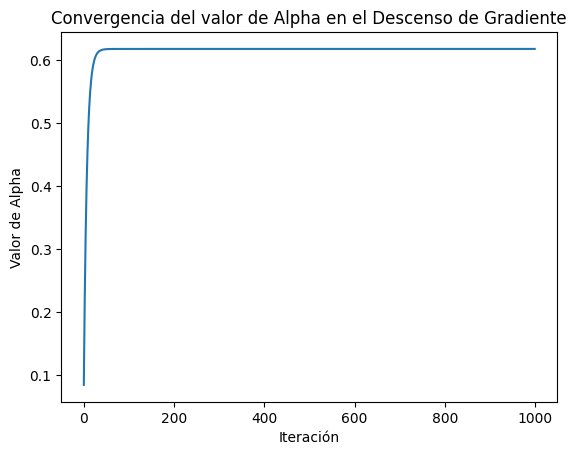

In [5]:
# Solución Iterativa (Descenso de Gradiente)

# Definir la función de costo (Error cuadrático)
def costo(alpha, a, b):
  return np.sum((a - alpha * b)**2)

# Calcular el gradiente de la función de costo con respecto a alpha
def gradiente(alpha, a, b):
  return -2 * np.dot(a - alpha * b, b)

# Parámetros para el descenso de gradiente
tasa_aprendizaje = 0.001 # Puedes ajustar este valor
num_iteraciones = 1000 # Puedes ajustar este valor
alpha_inicial = 0.0 # Valor inicial para alpha

# Lista para almacenar los valores de costo en cada iteración (para visualización opcional)
historial_costo = []
historial_alpha = []

# Algoritmo de Descenso de Gradiente
alpha_actual = alpha_inicial

for i in range(num_iteraciones):
  grad = gradiente(alpha_actual, vector_a, vector_b)
  alpha_actual = alpha_actual - tasa_aprendizaje * grad

  # Opcional: almacenar historial para análisis
  historial_costo.append(costo(alpha_actual, vector_a, vector_b))
  historial_alpha.append(alpha_actual)


escalar_proyeccion_iterativa = alpha_actual
proyeccion_iterativa = escalar_proyeccion_iterativa * vector_b

print("\n--- Descenso de Gradiente ---")
print("Escalar de proyección (iterativa):", escalar_proyeccion_iterativa)
print("Proyección iterativa de a sobre b:", proyeccion_iterativa)
print("Costo final:", costo(escalar_proyeccion_iterativa, vector_a, vector_b))

# Visualizar el historial de alpha (para ver la convergencia)
plt.plot(historial_alpha)
plt.xlabel("Iteración")
plt.ylabel("Valor de Alpha")
plt.title("Convergencia del valor de Alpha en el Descenso de Gradiente")
plt.show()

# Opcional: Visualizar el historial de costo (para ver la convergencia)
# plt.plot(historial_costo)
# plt.xlabel("Iteración")
# plt.ylabel("Costo")
# plt.title("Convergencia del Descenso de Gradiente")
# plt.show()


--- Comparación de Resultados ---
Proyección Analítica: [4.94117647 1.23529412]
Proyección Iterativa: [4.94117647 1.23529412]


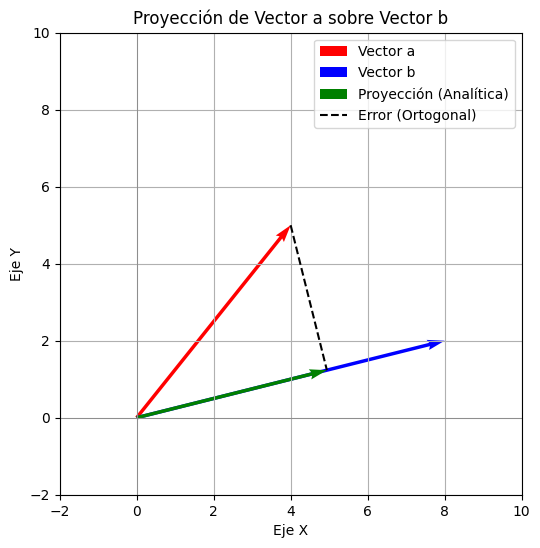

In [4]:
# Comparación de resultados
print("\n--- Comparación de Resultados ---")
print("Proyección Analítica:", proyeccion_analitica)
print("Proyección Iterativa:", proyeccion_iterativa)

# Visualización de los vectores
plt.figure(figsize=(8, 6))

# Vector a
plt.quiver(0, 0, vector_a[0], vector_a[1], angles='xy', scale_units='xy', scale=1, color='r', label='Vector a')

# Vector b
plt.quiver(0, 0, vector_b[0], vector_b[1], angles='xy', scale_units='xy', scale=1, color='b', label='Vector b')

# Proyección analítica (debería ser muy similar a la iterativa)
plt.quiver(0, 0, proyeccion_analitica[0], proyeccion_analitica[1], angles='xy', scale_units='xy', scale=1, color='g', label='Proyección (Analítica)')

# Proyección iterativa (opcional, si quieres verla separada o si hay diferencia)
# plt.quiver(0, 0, proyeccion_iterativa[0], proyeccion_iterativa[1], angles='xy', scale_units='xy', scale=1, color='purple', label='Proyección (Iterativa)')


# Línea desde el final de a hasta el final de la proyección (ortogonal)
plt.plot([vector_a[0], proyeccion_analitica[0]], [vector_a[1], proyeccion_analitica[1]], 'k--', label='Error (Ortogonal)')


plt.xlim([-2, 10])
plt.ylim([-2, 10])
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.title("Proyección de Vector a sobre Vector b")
plt.grid()
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()